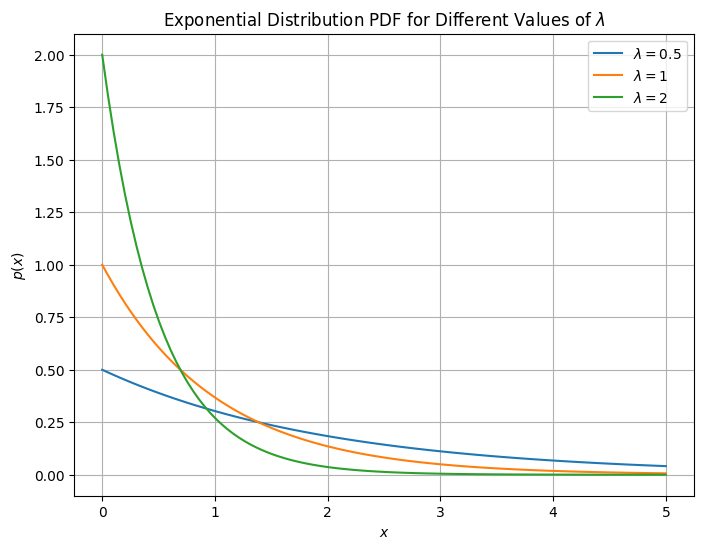

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def exponential_pdf(x, mylambda):
    return mylambda * np.exp(-mylambda * x)

mylambda_values = [0.5, 1, 2]

x_values = np.linspace(0, 5, 100)

plt.figure(figsize=(8, 6))
for mylambda in mylambda_values:
    plt.plot(x_values, exponential_pdf(x_values, mylambda), label=f'$\lambda = {mylambda}$')

plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.title('Exponential Distribution PDF for Different Values of $\\lambda$')

plt.legend()

plt.grid(True)
plt.show()


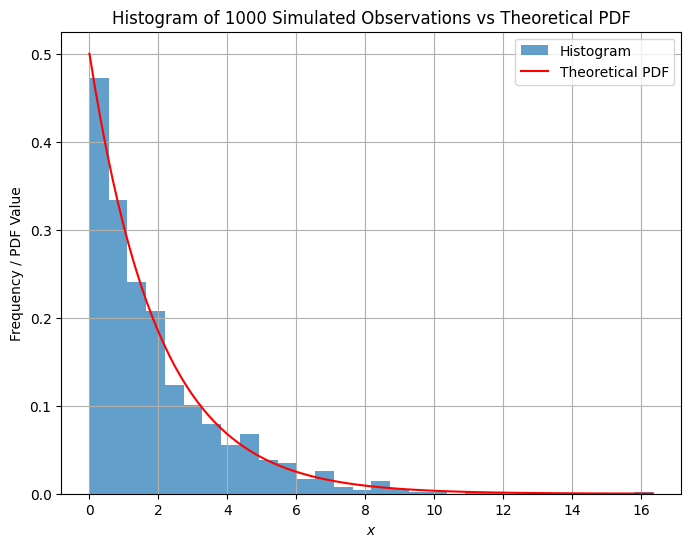

In [2]:
from scipy.stats import expon

np.random.seed(42)

num_observations = 1000
mylambda = 0.5

observations = np.random.exponential(scale=1/mylambda, size=num_observations)


plt.figure(figsize=(8, 6))
plt.hist(observations, bins=30, density=True, alpha=0.7, label='Histogram')


x_values = np.linspace(0, max(observations), 100)
pdf_values = expon.pdf(x_values, scale=1/mylambda)
plt.plot(x_values, pdf_values, 'r-', label='Theoretical PDF')


plt.xlabel('$x$')
plt.ylabel('Frequency / PDF Value')
plt.title('Histogram of 1000 Simulated Observations vs Theoretical PDF')
plt.legend()

plt.grid(True)
plt.show()


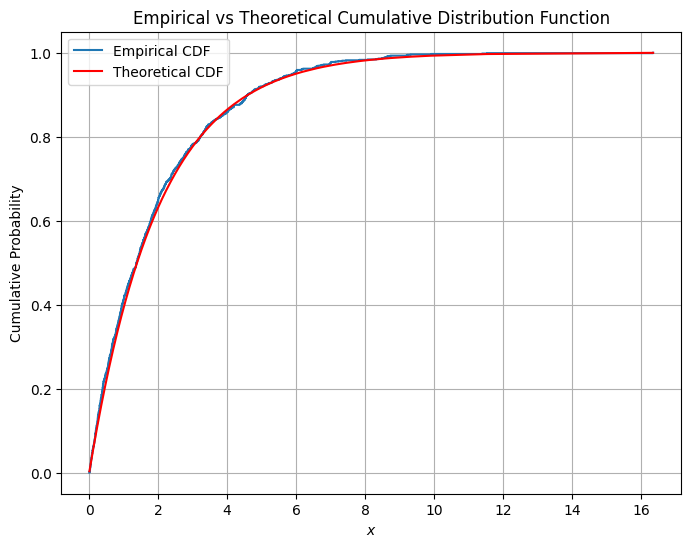

In [3]:
from scipy.stats import expon


np.random.seed(42)


num_observations = 1000
mylambda = 0.5


observations = np.random.exponential(scale=1/mylambda, size=num_observations)


sorted_observations = np.sort(observations)


ecdf_values = np.arange(1, num_observations + 1) / num_observations


cdf_values = expon.cdf(sorted_observations, scale=1/mylambda)


plt.figure(figsize=(8, 6))
plt.step(sorted_observations, ecdf_values, label='Empirical CDF', where='post')
plt.plot(sorted_observations, cdf_values, 'r-', label='Theoretical CDF')

plt.xlabel('$x$')
plt.ylabel('Cumulative Probability')
plt.title('Empirical vs Theoretical Cumulative Distribution Function')
plt.legend()

plt.grid(True)
plt.show()


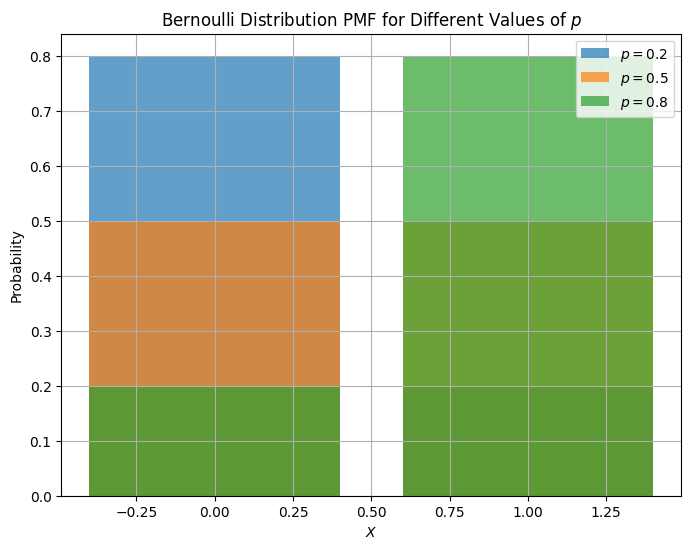

In [4]:
from scipy.stats import bernoulli


p_values = [0.2, 0.5, 0.8]


x_values = [0, 1]


plt.figure(figsize=(8, 6))
for p in p_values:
    pmf_values = bernoulli.pmf(x_values, p)
    plt.bar(x_values, pmf_values, label=f'$p = {p}$', alpha=0.7)


plt.xlabel('$X$')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution PMF for Different Values of $p$')
plt.legend()


plt.grid(True)
plt.show()


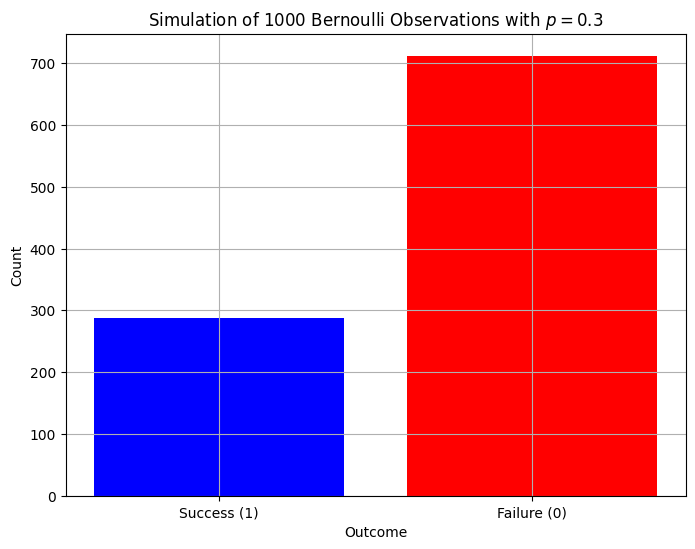

In [5]:
np.random.seed(42)

num_observations = 1000
p = 0.3


observations = bernoulli.rvs(p, size=num_observations)


success_count = np.sum(observations == 1)
failure_count = np.sum(observations == 0)

plt.figure(figsize=(8, 6))
plt.bar(['Success (1)', 'Failure (0)'], [success_count, failure_count], color=['blue', 'red'])

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Simulation of 1000 Bernoulli Observations with $p=' + str(p) + '$')

plt.grid(True)
plt.show()



In [7]:
from scipy.integrate import quad

def monte_carlo_integration(func, a, b, num_samples):
    x_samples = np.random.uniform(a, b, num_samples)
    f_values = func(x_samples)
    integral_estimate = np.mean(f_values) * (b - a)
    return integral_estimate

def integrand(x):
    return np.exp(x**2) * np.cos(np.pi * x)

a = 0
b = 1

true_value, _ = quad(integrand, a, b)

num_samples_list = [100, 1000, 5000, 10000, 50000, 100000, 500000]

print(f"True Value: {true_value:.5f}")

for num_samples in num_samples_list:
    integral_estimate = monte_carlo_integration(integrand, a, b, num_samples)
    error = np.abs(integral_estimate - true_value)
    print(f"Number of Samples: {num_samples}, Monte Carlo Estimate: {integral_estimate:.5f}, Error: {error:.5f}")


True Value: -0.30798
Number of Samples: 100, Monte Carlo Estimate: -0.39375, Error: 0.08577
Number of Samples: 1000, Monte Carlo Estimate: -0.35457, Error: 0.04659
Number of Samples: 5000, Monte Carlo Estimate: -0.30127, Error: 0.00671
Number of Samples: 10000, Monte Carlo Estimate: -0.31801, Error: 0.01003
Number of Samples: 50000, Monte Carlo Estimate: -0.31174, Error: 0.00375
Number of Samples: 100000, Monte Carlo Estimate: -0.31006, Error: 0.00208
Number of Samples: 500000, Monte Carlo Estimate: -0.30699, Error: 0.00099


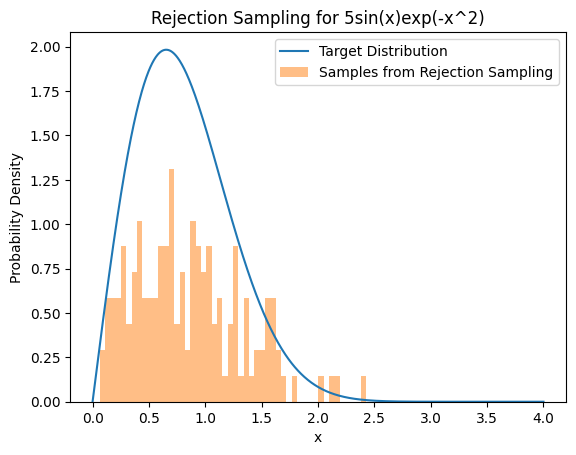

In [8]:
def target_distribution(x):
    return 5 * np.sin(x) * np.exp(-x**2)

def proposal_distribution(a, b, size):
    return np.random.uniform(a, b, size)

def rejection_sampling(target_func, proposal_func, a, b, M, num_samples):
    samples = []
    for _ in range(num_samples):
        x_proposal = proposal_func(a, b, 1)[0]
        u = np.random.uniform(0, M * proposal_func(a, b, 1)[0])
        if u <= target_func(x_proposal):
            samples.append(x_proposal)
    return np.array(samples)

a = 0
b = 4
M = 3
num_samples = 1000


samples = rejection_sampling(target_distribution, proposal_distribution, a, b, M, num_samples)


x_values = np.linspace(a, b, 1000)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution')
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples from Rejection Sampling')
plt.legend()
plt.title('Rejection Sampling for 5sin(x)exp(-x^2)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()
